# Introduction to Probability and Statistics
|
In this notebook, we will play around with some of the concepts we have previously discussed. Many concepts from probability and statistics are well-represented in major libraries for data processing in Python, such as `numpy` and `pandas`.

In [6]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


## Random Variables and Distributions

Let's start with drawing a sample of 30 variables from a uniform disribution from 0 to 9. We will also compute mean and variance.

In [17]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [4, 6, 3, 0, 3, 4, 7, 7, 9, 6, 8, 2, 0, 3, 10, 7, 2, 0, 2, 1, 1, 6, 5, 0, 9, 0, 1, 8, 2, 9]
Mean = 4.166666666666667
Variance = 10.272222222222222


To visually estimate how many different values are there in the sample, we can plot the **histogram**:

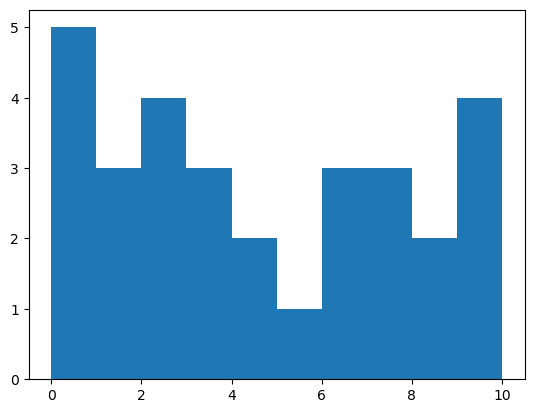

In [18]:
plt.hist(sample)
plt.show()

## Analyzing Real Data

Mean and variance are very important when analyzing real-world data. Let's load the data about baseball players from [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)

In [26]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t',header=None,names=['Name','Team','Rome','Height','Weight','Age'])
df

,Name,Team,Rome,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


> We are using a package called **Pandas** here for data analysis. We will talk more about Pandas and working with data in Python later in this course.

Let's compute average values for age, height and weight:

In [30]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height     73.697292
Weight    201.689255
dtype: float64

Age, height and weight are all continuous random variables. What do you think their distribution is? A good way to find out is to plot the histogram of values: 

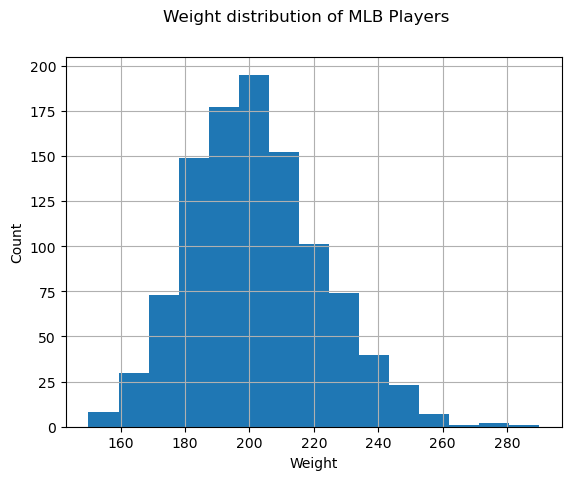

In [40]:
df['Weight'].hist(bins=15)
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [44]:
print(list(df['Weight'])[:20])

[180.0, 215.0, 210.0, 210.0, 188.0, 176.0, 209.0, 200.0, 231.0, 180.0, 188.0, 180.0, 185.0, 160.0, 180.0, 185.0, 197.0, 189.0, 185.0, 219.0]


In [49]:
mean = df['Weight'].mean()
var = df['Weight'].var()
std = df['Weight'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.6892545982575
Variance = 440.6426848120547
Standard Deviation = 20.991490771549664


## Normal Distribution

Let's create an artificial sample of weights that follows normal distribution with the same mean and variance as real data:

In [60]:
generated = np.random.normal(mean,std,1000)
generated[:20]

array([187.05660174, 181.77292853, 183.09148457, 198.30703945,
       201.51640234, 213.21564624, 221.00562653, 218.30263433,
       234.16968198, 187.40138853, 199.34286071, 205.52705493,
       251.03651986, 189.64156046, 222.23536452, 211.37502445,
       205.07287496, 207.90248813, 180.66579133, 226.86092236])

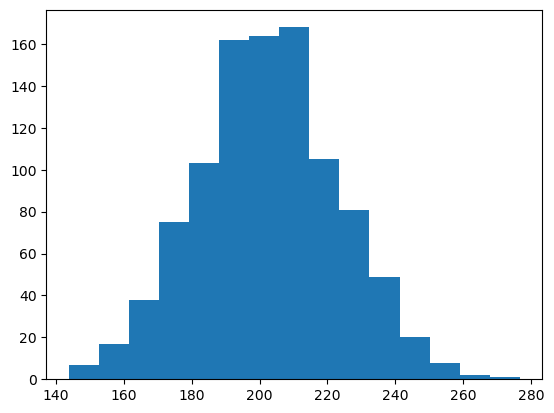

In [54]:
plt.hist(generated,bins=15)
plt.show()

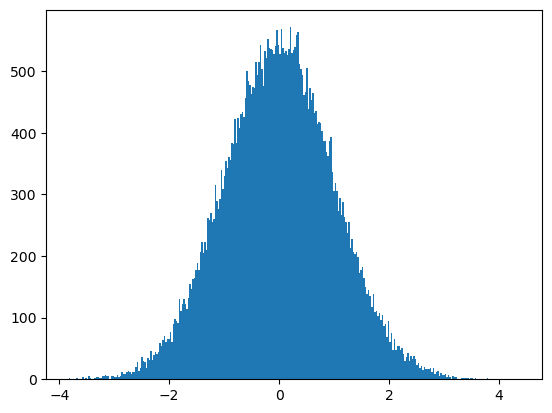

In [62]:
plt.hist(np.random.normal(0,1,50000),bins=300)
plt.show()

Since most values in real life are normally distributed, it means we should not use uniform random number generator to generate sample data. Here is what happens if we try to generate weights with uniform distribution (generated by `np.random.rand`):

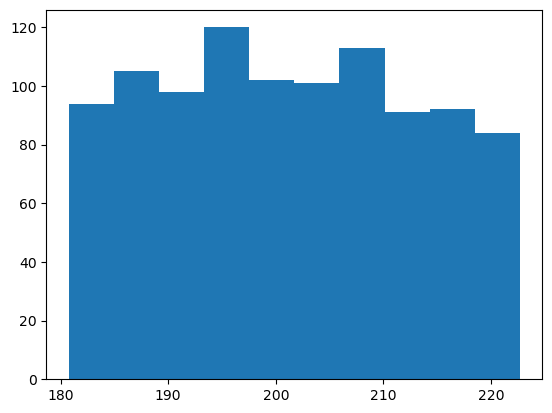

In [63]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.hist(wrong_sample)
plt.show()

## Simulating Normal Distribution with Central Limit Theorem

Pseudo-random generator in Python is designed to give us uniform distribution. If we want to create a generator for normal distribution, we can use central limit theorem. To get a normally distributed value we will just compute a mean of a uniform-generated sample.

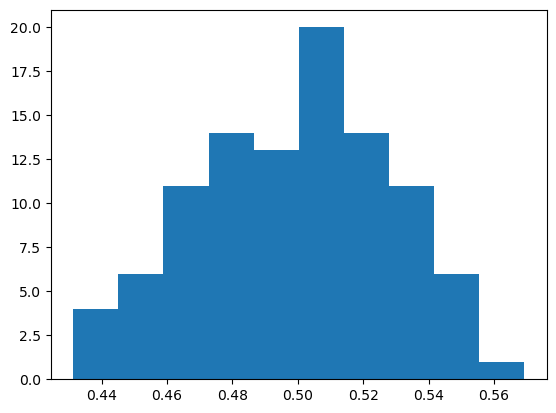

In [64]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.hist(sample)
plt.show()

## Correlation and Evil Baseball Corp

Correlation allows us to find inner connection between data sequences. In our toy example, let's pretend there is an evil baseball corporation that pays it's players according to their height - the taller the player is, the more money he/she gets. Suppose there is a base salary of $1000, and an additional bonus from $0 to $100, depending on height. We will take the real players from MLB, and compute their imaginary salaries:

In [99]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights,salaries))[:10])

[(74, 1075.2469071629068), (74, 1075.2469071629068), (72, 1053.7477908306478), (72, 1053.7477908306478), (73, 1064.4973489967772), (69, 1021.4991163322591), (69, 1021.4991163322591), (71, 1042.9982326645181), (76, 1096.746023495166), (71, 1042.9982326645181)]


Let's now compute covariance and correlation of those sequences. `np.cov` will give us so-called **covariance matrix**, which is an extension of covariance to multiple variables. The element $M_{ij}$ of the covariance matrix $M$ is a correlation between input variables $X_i$ and $X_j$, and diagonal values $M_{ii}$ is the variance of $X_{i}$. Similarly, `np.corrcoef` will give us **correlation matrix**.

In [100]:
print(f"Covariance matrix:\n{np.cov(heights,salaries)}")
print(f"Covariance = {np.cov(heights,salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")

Covariance matrix:
[[  5.31679808  57.15323023]
 [ 57.15323023 614.37197275]]
Covariance = 57.15323023054467
Correlation = 1.0


Correlation equal to 1 means that there is a strong **linear relation** between two variables. We can visually see the linear relation by plotting one value against the other:

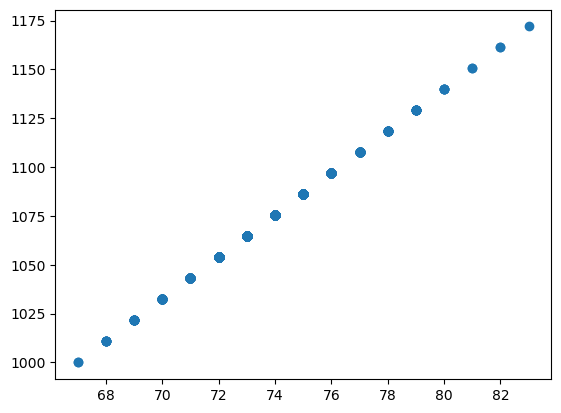

In [101]:
plt.scatter(heights,salaries)
plt.show()

Let's see what happens if the relation is not linear. Suppose that our corporation decided to hide the obvious linear dependency between heights and salaries, and introduced some non-linearity into the formula, such as `sin`:

In [91]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")

Correlation = 0.9835304456670811


In this case, the correlation is slightly smaller, but it is still quite high. Now, to make the relation even less obvious, we might want to add some extra randomness by adding some random variable to the salary. Let's see what happens:

In [102]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")

Correlation = 0.9384710733057905


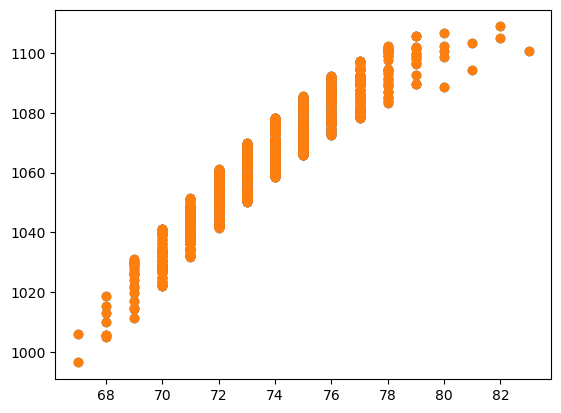

In [104]:
plt.scatter(heights, salaries)
plt.show()

> Can you guess why the dots line up into vertical lines like this?

We have observed the correlation between artificially engineered concept like salary and the observed variable *height*. Let's also see if the two observed variables, such as height and weight, also correlate:

In [111]:
np.corrcoef(df['Height'],df['Weight'])

array([[ 1., nan],
       [nan, nan]])

Unfortunately, we did not get any results - only some strange `nan` values. This is due to the fact that some of the values in our series are undefined, represented as `nan`, which causes the result of the operation to be undefined as well. By looking at the matrix we can see that `Weight` is problematic column, because self-correlation between `Height` values has been computed.

> This example shows the importance of **data preparation** and **cleaning**. Without proper data we cannot compute anything.

Let's use `fillna` method to fill the missing values, and compute the correlation: 

In [114]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

The is indeed a correlation, but not such a strong one as in our artificial example. Indeed, if we look at the scatter plot of one value against the other, the relation would be much less obvious:

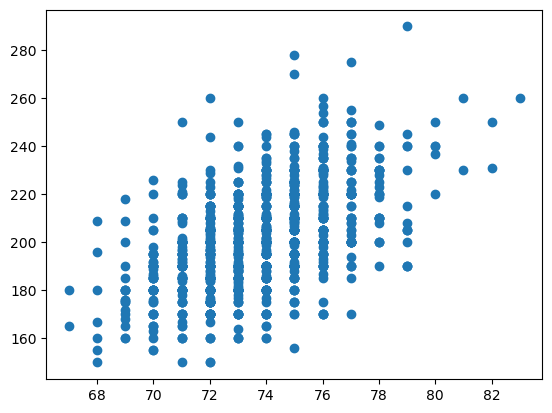

In [115]:
plt.scatter(df['Height'],df['Weight'])
plt.show()